# PID Controllers
In this notebook, we explore the PID controllers by explaining the underlying theory and by providing a simulation of a simple first and second order system to practice tuning PID gain parameters.

In [7]:
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal

<IPython.core.display.Javascript object>


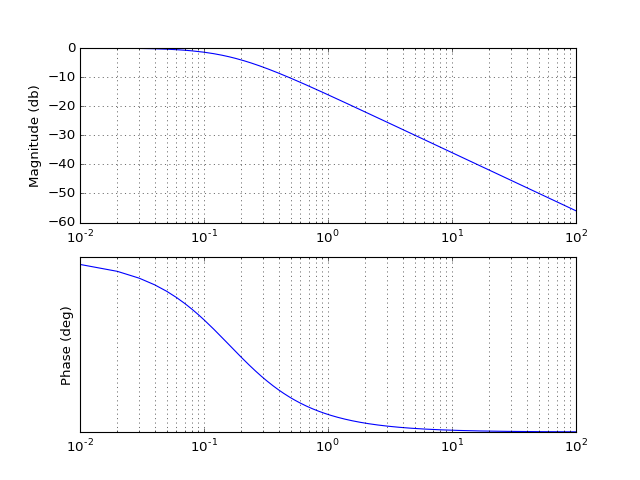

(array([ -1.71115043e-02,  -6.80451755e-02,  -1.51629267e-01, ...,
         -5.59610022e+01,  -5.59618710e+01,  -5.59627397e+01]),
 array([ 356.40472622,  352.83754419,  349.32525059, ...,  270.09121635,
         270.09120723,  270.09119811]))

In [8]:
def bode(G,f=np.arange(.01,100,.01)):
    plt.figure()
    jw = 2*np.pi*f*1j
    y = np.polyval(G.num, jw) / np.polyval(G.den, jw)
    mag = 20.0*np.log10(abs(y))
    phase = np.arctan2(y.imag, y.real)*180.0/np.pi % 360

    plt.subplot(211)
    plt.semilogx(f,mag)
    plt.grid()
    plt.gca().xaxis.grid(True, which='minor')

    plt.ylabel(r'Magnitude (dB)')

    plt.subplot(212)
    #plt.semilogx(jw.imag, phase)
    plt.semilogx(f,phase)
    plt.grid()
    plt.gca().xaxis.grid(True, which='minor')
    plt.ylabel(r'Phase (deg)')
    plt.yticks(np.arange(0, phase.min()-30, -30))

    return mag, phase

f=scipy.signal.lti([1],[1,1])
bode(f)